In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read Kaggle CSV of trending YouTube videos from November 14th through June 14th

df = pd.read_csv("/Users/alex/Downloads/USvideos.csv")

In [3]:
df.shape

(40949, 16)

In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
#Videos can trend for multiple days, so there are a number of duplicates
#After removing duplicates, 6,455 videos out of the original 40,949 remain 

df_cleaned = df.drop_duplicates(subset='title')
df_cleaned.shape

(6455, 16)

In [6]:
#Group by category to see how many videos are trending by category 

df_counts = df_cleaned.groupby('category_id').count()
df_counts.reset_index(inplace=True)
df_counts.sort_values(by="video_id", inplace=True)
df_counts

,category_id,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
15,43,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
14,29,15,15,15,15,15,15,15,15,15,15,15,15,15,15,14
5,19,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
1,2,72,72,72,72,72,72,72,72,72,72,72,72,72,72,70
6,20,104,104,104,104,104,104,104,104,104,104,104,104,104,104,102
3,15,142,142,142,142,142,142,142,142,142,142,142,142,142,142,141
12,27,256,256,256,256,256,256,256,256,256,256,256,256,256,256,253
0,1,321,321,321,321,321,321,321,321,321,321,321,321,321,321,320
13,28,390,390,390,390,390,390,390,390,390,390,390,390,390,390,385
4,17,456,456,456,456,456,456,456,456,456,456,456,456,456,456,446


In [7]:
#Group by category and means to see the average comment and view counts

df_means = df_cleaned.groupby('category_id').mean()
df_means.reset_index(inplace=True)
df_means.sort_values(by="comment_count", inplace=True)

In [8]:
df_data = df['views'].max()
df_data

225211923

In [9]:
#Dictionary of YouTube category IDs and values

cat_data = {2:'Autos & Vehicles',
            1:'Film & Animation',
            10:'Music',
            15:'Pets & Animals',
            17:'Sports',
            18:'Short Movies',
            19:'Travel & Events',
            20:'Gaming',
            21:'Videoblogging',
            22:'People & Blogs',
            23:'Comedy',
            24:'Entertainment',
            25:'News & Politics',
            26:'Howto & Style',
            27:'Education',
            28:'Science & Technology',
            29:'Nonprofits & Activism',
            30:'Movies',
            31:'Anime/Animation',
            32:'Action/Adventure',
            33:'Classics',
            34:'Comedy',
            35:'Documentary',
            36:'Drama',
            37:'Family',
            38:'Foreign',
            39:'Horror',
            40:'Sci-Fi/Fantasy',
            41:'Thriller',
            42:'Shorts',
            43:'Shows',
            44:'Trailers'}

In [10]:
#Create lists of category IDs and videos IDs

cat_id = list(df_counts.category_id)
total_videos = list(df_counts['video_id'])

#Loop through the lists to append category names to the correct rows

objects = []
for cat in cat_id:
    for index, name in cat_data.items():
        if index == int(cat):
            objects.append(name)


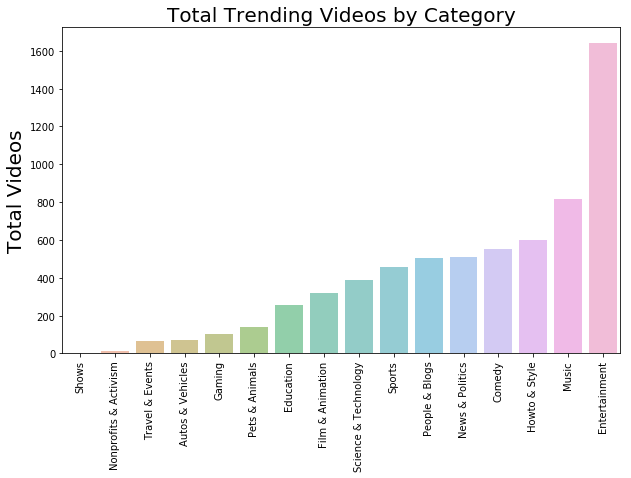

In [11]:
#Use a bar plot to compare total trending videos by category

plt.figure(figsize=(10,6))
sns.barplot(y=total_videos, x=objects, alpha=0.6)
plt.xticks(rotation=90)
plt.title("Total Trending Videos by Category", fontsize=20)
plt.ylabel("Total Videos", fontsize=20)
plt.savefig("video_count_by_category.png", bbox_inches='tight', dpi=100)
plt.show()

## Number of Trending Videos by Category Analysis

Entertainment videos comprised over 25% of unique videos (more than 1600 videos) in the dataset. Music videos came in second with over 800 total videos. 

A number of categories, such as "Classics" and "Documentaries" had no trending videos, and some categories like "Shows" and "Nonprofits & Activism" had very few videos. 

In [12]:
#Append list of category names to the means dataframe

cat_id = list(df_means.category_id)
comments = list(df_means['comment_count'])

objects = []
for cat in cat_id:
    for index, name in cat_data.items():
        if index == int(cat):
            objects.append(name)


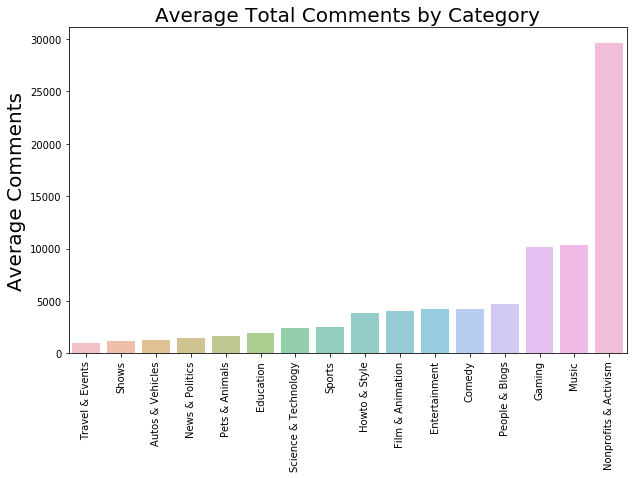

In [13]:
#Use a bar plot to compare average comments by category

plt.figure(figsize=(10,6))
sns.barplot(y=comments, x=objects, alpha=0.6)
plt.xticks(rotation=90)
plt.title("Average Total Comments by Category", fontsize=20)
plt.ylabel("Average Comments", fontsize=20)
plt.savefig("comments_by_category.png", bbox_inches='tight', dpi=100)
plt.show()


## Average Number of Comments by Category Analysis

"Nonprofits & Activism" stands out as having the most average comments per video in the sample. However, as mentioned above, the same size for Nonprofits & Activism was very small (just 15 videos). 

The "Music" and "Gaming" categories had over 10,000 comments per trending video on average, more than twice as many as the other categories. Even though "Gaming" did not have many trending videos in the set, the user engagement seems higher than some other categories. 



In [14]:
#A look at Nonprofit/Activism video list to view total comments
#Two videos dramatically impacted the average views and comments
df_cleaned.loc[df_cleaned['category_id'] == 29]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
3313,aLSG3178eD4,17.30.11,Tell Hollywood to stand with immigrants,Define American,29,2017-11-28T13:00:35.000Z,"DACA|""black panther""",1456,0,0,0,https://i.ytimg.com/vi/aLSG3178eD4/default.jpg,True,True,False,"Undocumented in Hollywood? Yes, and we are #He..."
4934,0jmDHoPUGKI,17.08.12,NSC | Face to Face with the Prescription Opioi...,National Safety Council,29,2017-12-05T13:50:17.000Z,"National Safety Council|""Opioid misuse""|""addic...",1967,19,0,3,https://i.ytimg.com/vi/0jmDHoPUGKI/default.jpg,False,False,False,"Each year 22,000 people die from prescription ..."
6463,6kLYXbNZWRs,17.16.12,Meet Teen Vogue's 2017 21 Under 21 | Teen Vogue,Teen Vogue,29,2017-12-15T17:00:19.000Z,"inspiring|""teen vogue""|""21 under 21""|""nadya""|""...",7052,686,13,29,https://i.ytimg.com/vi/6kLYXbNZWRs/default.jpg,False,False,False,"Meet Teen Vogue’s 21 Under 21 class of 2017, f..."
7547,xYShiXMGULE,17.21.12,Living under a bridge doesn't stop this homele...,Invisible People,29,2017-12-17T06:10:08.000Z,"mark horvath|""homeless""|""homelessness""|""invisi...",33685,1450,51,638,https://i.ytimg.com/vi/xYShiXMGULE/default.jpg,False,False,False,A few months back I logged onto Facebook and w...
10473,Pc1Obe1BWhc,18.05.01,Nina Dobrev wants to Save Sharks (30s),Oceana,29,2018-01-03T16:01:48.000Z,"Sharks|""Nina Dobrev""|""Shark finning""|""PSA""",4178,16,1,3,https://i.ytimg.com/vi/Pc1Obe1BWhc/default.jpg,False,False,False,"While shark finning is illegal in U.S. waters,..."
11377,Pc1Obe1BWhc,18.09.01,Nina Dobrev Wants to Save Sharks (30s),Oceana,29,2018-01-03T16:01:48.000Z,"Sharks|""Nina Dobrev""|""Shark finning""|""PSA""",8493,31,1,3,https://i.ytimg.com/vi/Pc1Obe1BWhc/default.jpg,False,False,False,"While shark finning is illegal in U.S. waters,..."
11541,ESRAQtXVQL0,18.12.01,Homeless little boy gets a bed for Christmas,Humble Design,29,2018-01-09T02:00:25.000Z,"charity|""humble design""|""detroit""|""design""|""ho...",23634,131,13,23,https://i.ytimg.com/vi/ESRAQtXVQL0/default.jpg,False,False,False,Daeyers is eight years old and has been homele...
11925,mt22NvsTRG0,18.14.01,The Obama Presidential Center: Where We Are Now,Obama Foundation,29,2018-01-12T19:17:22.000Z,[none],42194,1384,66,142,https://i.ytimg.com/vi/mt22NvsTRG0/default.jpg,False,False,False,"One year ago, President and Mrs. Obama laid ou..."
14000,oWjxSkJpxFU,18.25.01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,2018-01-24T18:30:01.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",8041970,1167488,147643,363133,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...
15659,ZYKUXMAou3Q,18.02.02,Rose McGowan Shares Her Thoughts On 'Time's Up...,The View,29,2018-01-30T16:50:26.000Z,"Rose McGowan|""Rose's Army""|""MeToo""|""Time's Up""...",225051,3075,702,1439,https://i.ytimg.com/vi/ZYKUXMAou3Q/default.jpg,False,False,False,NaN


In [15]:
df_means.sort_values(by="views", inplace=True)

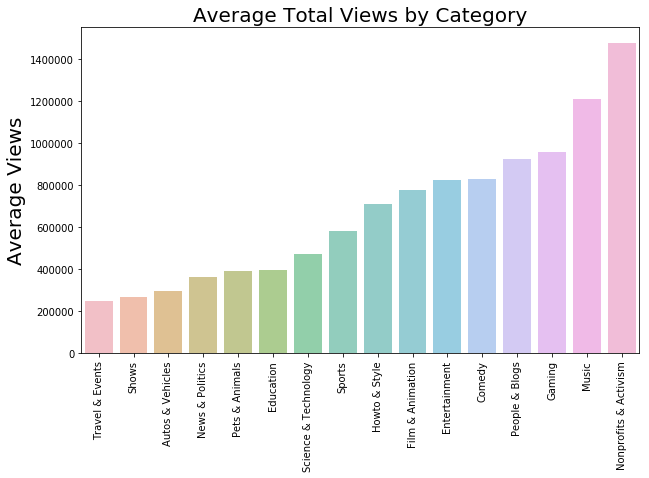

In [16]:
#Collect the average views

views = list(df_means['views'])

#Use a bar plot to compare average views by category

plt.figure(figsize=(10,6))
sns.barplot(y=views, x=objects, alpha=0.6)
plt.xticks(rotation=90)
plt.title("Average Total Views by Category", fontsize=20)
plt.ylabel("Average Views", fontsize=20)
plt.savefig("views_by_category.png", bbox_inches='tight', dpi=100)
plt.show()

## Average Number of Views by Category Analysis

"Nonprofits & Activism" once again stands out as an outlier. This category had a couple of videos with high view and comment counts that skewed the sample. 

The "Music" and "Gaming" categories had the highest average views per video, followed closely by "People & Blogs"."Music" and "Gaming" are a couple higher engagement categories. 

There is also a clear relationship between views and comments, as low average view categories such as "Travel & Events", "Autos & Vehicles", and "News & Politics" also have the lowest comment levels. 
